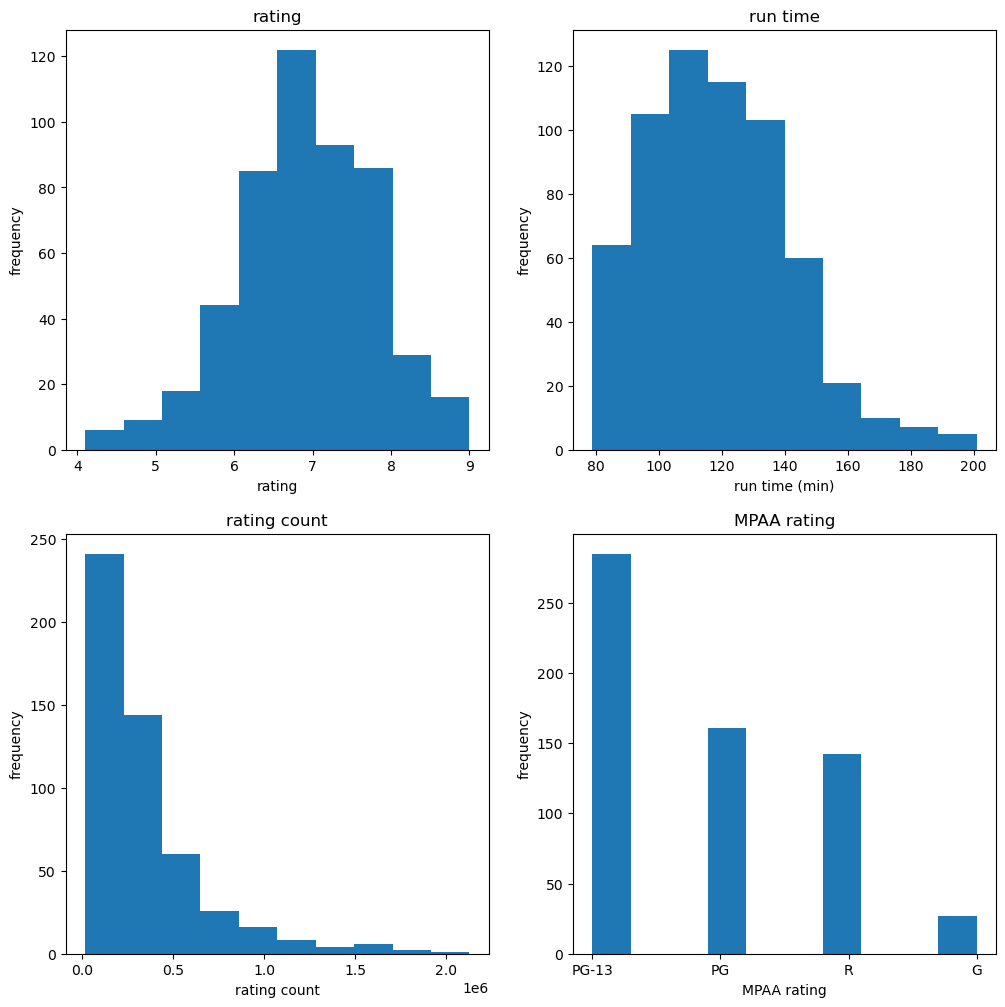

movieid         0
title           0
mpaa_rating     0
budget          0
gross           0
release_date    0
genre           0
runtime         0
rating          0
rating_count    0
dtype: int64


,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count


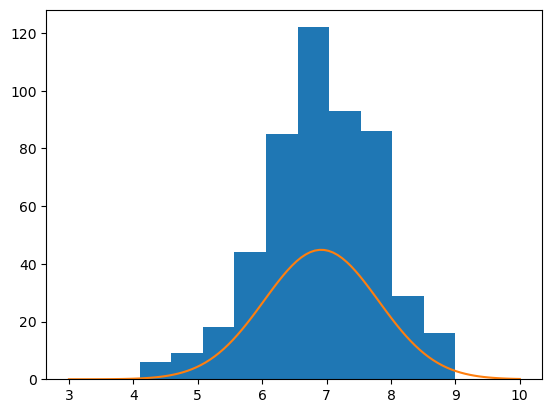

In [196]:
import pandas as pd
import numpy as np
#from  matplotlib import pyplot as plt
df=pd.read_csv('./movies_2.csv')
df.head(4)
#Get rid of the Summary column
df.drop('Summary', axis=1, inplace=True)
#change all columns names lowercase and add an underscore if they are made of 2 words
df.columns=df.columns.str.replace(' ', '_')
df= df.rename(columns=str.lower )
# find the nan value of column 'title'
df[df['title'].isna()]
# remove the last row
df.drop(615, axis=0, inplace=True)
# plot histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

plt.subplot(2,2,1)
plt.hist(df['rating'])
plt.title('rating')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.subplot(2,2,2)
plt.hist(df['runtime'])
plt.title('run time')
plt.xlabel('run time (min)')
plt.ylabel('frequency')
plt.subplot(2,2,3)
plt.hist(df['rating_count'])
plt.title('rating count')
plt.xlabel('rating count')
plt.ylabel('frequency')
plt.subplot(2,2,4)
plt.hist(df['mpaa_rating'])
plt.title('MPAA rating')
plt.xlabel('MPAA rating')
plt.ylabel('frequency')
plt.show()
fig.tight_layout(pad=5.0)
# remove nan values of rating
df.dropna(subset=['rating'],inplace=True)
print(df.isna().sum())
# plot normal distribution for rating
#p(x) = e−(x − μ)2/2σ2/σ √2π.
mean_d=df['rating'].mean()
median_d=df['rating'].median()
std_d=df['rating'].std()
x=np.linspace(3,10,100)
def f(x):
    return (np.exp((-0.5*(x-mean_d)**2)/std_d**2))/(std_d*(2*np.pi)**0.5)

    
y=f(x)*100


plt.hist(df['rating'])
plt.plot(x,y)


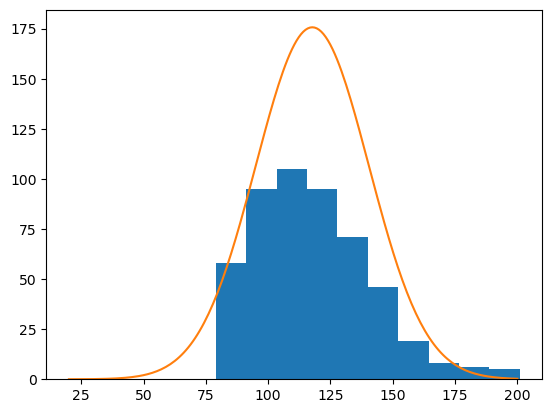

In [144]:
df['runtime'].fillna(value=df['runtime'].median(), inplace= True)
mean_d=df['runtime'].mean()
std_d=df['runtime'].std()
x=np.linspace(20,200,200)
def f(x):
    return (np.exp((-0.5*(x-mean_d)**2)/std_d**2))/(std_d*(2*np.pi)**0.5)

    
y=f(x)*10000


plt.hist(df['runtime'])
plt.plot(x,y)



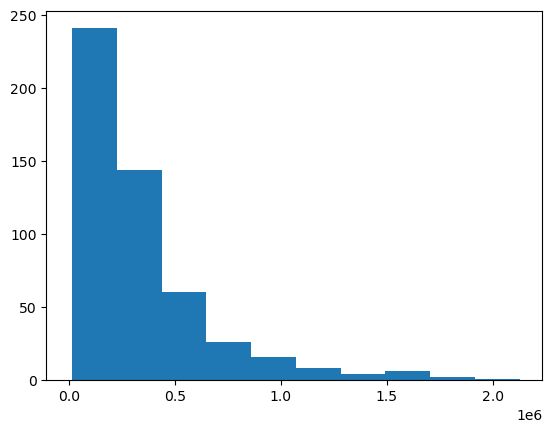

In [145]:
df['rating_count'].fillna(value=df['rating_count'].median, inplace=True)
mean_d=df['rating_count'].mean()
std_d=df['rating_count'].std()
x=np.linspace(0,2,200)
def f(x):
    return (np.exp((-0.5*(x-mean_d)**2)/std_d**2))/(std_d*(2*np.pi)**0.5)

    
y=f(x)*10000000


plt.hist(df['rating_count'])
plt.plot(x,y)


In [146]:
def new_fun(x):
    return x*2-4

df['runtime']=df['runtime'].apply(new_fun)
df

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
0,1,Look Who's Talking,PG-13,7500000.0,296000000.0,1989-10-12,Romance,182.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,194.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000.0,71079915.0,1989-07-28,Crime,196.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000.0,161001698.0,1989-12-20,War,286.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000.0,84431625.0,1989-04-21,Drama,210.0,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...
505,506,Big Hero 6,PG,165000000.0,652105443.0,2014-10-24,Animation,200.0,7.8,380953.0
506,507,Interstellar,PG-13,165000000.0,675120017.0,2014-11-05,Science Fiction,334.0,8.6,1343549.0
507,508,Captain America: The Winter Soldier,PG-13,170000000.0,714766572.0,2014-03-20,Action,268.0,7.7,685903.0
508,509,Dawn of the Planet of the Apes,PG-13,170000000.0,710644566.0,2014-06-26,Science Fiction,256.0,7.6,395425.0


array([[<AxesSubplot:title={'center':'runtime'}>]], dtype=object)

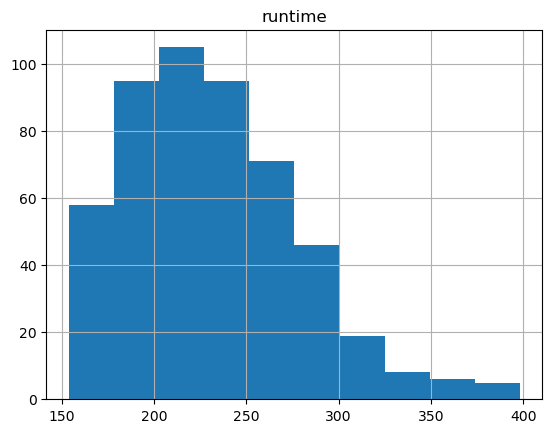

In [147]:
df.hist(column='runtime' )



{'whiskers': [<matplotlib.lines.Line2D at 0x7faf76db5b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7faf76db5040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faf76db5850>],
 'medians': [<matplotlib.lines.Line2D at 0x7faf773b6310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faf773b6160>],
 'means': []}

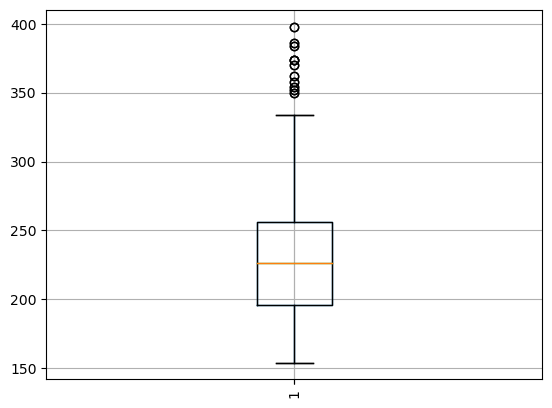

In [148]:
df.boxplot(column='runtime', rot=90)
plt.boxplot(df['runtime'])

Text(0.5, 1.0, 'box plot of run time')

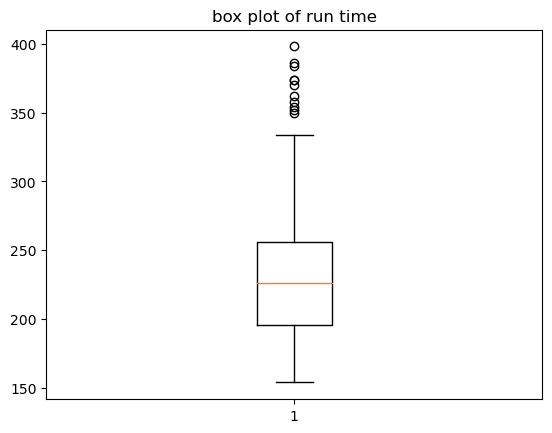

In [149]:
plt.boxplot(df['runtime'])
plt.title('box plot of run time')


In [150]:
#remove duplicated
df.drop_duplicates()
# change type of budget to int
df['budget']=df['budget'].astype('int32')

df['gross']=df['gross'].astype('int32')
df

df['release_date']=pd.to_datetime(df['release_date'], format="%Y/%m/%d")
df

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
0,1,Look Who's Talking,PG-13,7500000,296000000,1989-10-12,Romance,182.0,5.9,73638.0
1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,194.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,196.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,286.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,210.0,7.5,101702.0
...,...,...,...,...,...,...,...,...,...,...
505,506,Big Hero 6,PG,165000000,652105443,2014-10-24,Animation,200.0,7.8,380953.0
506,507,Interstellar,PG-13,165000000,675120017,2014-11-05,Science Fiction,334.0,8.6,1343549.0
507,508,Captain America: The Winter Soldier,PG-13,170000000,714766572,2014-03-20,Action,268.0,7.7,685903.0
508,509,Dawn of the Planet of the Apes,PG-13,170000000,710644566,2014-06-26,Science Fiction,256.0,7.6,395425.0


In [190]:
#show the movies with more than 7 in Rating & greater than 50 million Gross
df[(df['rating'] > 7) & (df['gross'] > 50000000)]

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,194.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,196.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000,161001698,1989-12-20,War,286.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,210.0,7.5,101702.0
6,7,When Harry Met Sally...,R,16000000,92800000,1989-07-21,Romance,188.0,7.6,180871.0
...,...,...,...,...,...,...,...,...,...,...
505,506,Big Hero 6,PG,165000000,652105443,2014-10-24,Animation,200.0,7.8,380953.0
506,507,Interstellar,PG-13,165000000,675120017,2014-11-05,Science Fiction,334.0,8.6,1343549.0
507,508,Captain America: The Winter Soldier,PG-13,170000000,714766572,2014-03-20,Action,268.0,7.7,685903.0
508,509,Dawn of the Planet of the Apes,PG-13,170000000,710644566,2014-06-26,Science Fiction,256.0,7.6,395425.0


In [152]:
#show the movies with more than 7 in Rating & greater than 50 
# million Gross & with Parental guidance as MPAA Rating
df[(df['rating_count']> 7) & (df['gross'] > 50000000) & (df['mpaa_rating'] == 'PG') ]

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,194.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000,71079915,1989-07-28,Crime,196.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000,84431625,1989-04-21,Drama,210.0,7.5,101702.0
5,6,Uncle Buck,PG,15000000,79258538,1989-08-16,Family,196.0,7.0,77659.0
7,8,Dead Poets Society,PG,16400000,235860116,1989-06-02,Drama,254.0,8.1,382002.0
...,...,...,...,...,...,...,...,...,...,...
484,485,The Croods,PG,135000000,585178928,2013-03-20,Animation,192.0,7.2,180043.0
485,486,Frozen,PG,150000000,1274219009,2013-11-27,Animation,200.0,7.5,527284.0
498,499,The Lego Movie,PG,60000000,469160692,2014-02-06,Animation,196.0,7.8,309295.0
503,504,How to Train Your Dragon 2,PG,145000000,609123048,2014-06-12,Animation,200.0,7.8,285394.0


In [153]:
#count of Animation movies with more than 7 in Rating (use the shape() function)
df1=df[(df['genre'] == 'Animation') & (df['rating'] > 7)]
df1.shape

(39, 10)

In [193]:
#show the list of top 5 movies based on Budget
df2=df.sort_values(by='budget', ascending=[0])
df2.head(5)
df.describe()

,movieid,budget,gross,runtime,rating,rating_count
count,508.000000,5.080000e+02,5.080000e+02,508.000000,508.000000,5.080000e+02
mean,254.582677,8.392227e+07,3.724712e+08,231.421260,6.917323,3.392521e+05
std,146.929101,5.975523e+07,2.794690e+08,45.420539,0.888928,3.213388e+05
min,1.000000,6.000000e+04,-2.147484e+09,154.000000,4.100000,1.491800e+04
25%,127.750000,3.507500e+07,1.956264e+08,196.000000,6.400000,1.275922e+05
50%,254.500000,7.000000e+07,3.093329e+08,226.000000,6.900000,2.403475e+05
75%,381.250000,1.250000e+08,4.774519e+08,256.000000,7.600000,4.257000e+05
max,510.000000,3.800000e+08,1.845034e+09,398.000000,9.000000,2.127228e+06


In [155]:
#show the top 5 Comedy movies by Rating
df3=df[(df['genre'] == 'Comedy')]
df3.sort_values(by='rating', ascending=[0])
df3.head(5)

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,2,Driving Miss Daisy,PG,7500000,145793296,1989-12-13,Comedy,194.0,7.4,91075.0
8,9,Parenthood,PG-13,20000000,126297830,1989-07-31,Comedy,244.0,7.0,41866.0
9,10,Lethal Weapon 2,R,25000000,227853986,1989-07-07,Comedy,224.0,7.2,151737.0
10,11,The War of the Roses,R,26000000,160200000,1989-12-08,Comedy,228.0,6.8,45248.0
14,15,Ghostbusters II,PG,37000000,215394738,1989-06-15,Comedy,212.0,6.6,171196.0


In [189]:
#top 5 movie names by Rating
df4=df.sort_values(by='rating', ascending=[0])
df4.head(5)
# or
df.nlargest(5,'rating')

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
393,394,The Dark Knight,PG-13,185000000,1004558444,2008-07-16,Action,300.0,9.0,2127228.0
83,84,Schindler's List,R,22000000,321365567,1993-11-29,History,386.0,8.9,1117322.0
98,99,Jurassic Park III,PG-13,93000000,368800000,2001-07-16,Thriller,180.0,8.9,1690474.0
99,100,Pulp Fiction,R,8000000,213928762,1994-09-10,Thriller,304.0,8.9,1690474.0
287,288,The Lord of the Rings: The Return of the King,PG-13,94000000,1118888979,2003-12-01,Fantasy,398.0,8.9,1529953.0


In [157]:
#top 3 high Gross Romance movies released after 1999, not included (typecast it to datetime)
df["release_date"] = pd.to_datetime(df["release_date"], format = "%Y/%m/%d")
df5=df[(df['genre'] == 'Romance') & (df['release_date'] >= "2000")]
df5.sort_values(by='gross', ascending= [0])
df5.head(3)

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
217,218,"Crouching Tiger, Hidden Dragon",PG-13,17000000,213525736,2000-10-01,Romance,236.0,7.8,242878.0
239,240,The Princess Diaries,G,37000000,165335153,2001-08-03,Romance,226.0,6.3,118754.0
258,259,Sweet Home Alabama,PG-13,30000000,180622424,2002-09-26,Romance,212.0,6.2,96978.0


In [158]:
#how many Genres are present in the dataframe?
#  (use the function value_counts() which applies to Series, not Dataframe)
df['genre'].value_counts()


Comedy             94
Action             76
Animation          63
Drama              56
Thriller           34
Science Fiction    31
Family             28
Romance            26
Adventure          26
Fantasy            22
Crime              16
Mystery            10
Horror              9
War                 8
Western             5
History             4
Name: genre, dtype: int64

In [169]:
#top 5 expensive movies released after 1999, not included (measured by Budget)
df6=df[df['release_date'] >= '2000']
df6.sort_values(by='budget', ascending= [0])
df6.head(5)


,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
98,99,Jurassic Park III,PG-13,93000000,368800000,2001-07-16,Thriller,180.0,8.9,1690474.0
217,218,"Crouching Tiger, Hidden Dragon",PG-13,17000000,213525736,2000-10-01,Romance,236.0,7.8,242878.0
218,219,Scary Movie,R,19000000,278019771,2000-07-07,Comedy,172.0,6.2,219032.0
219,220,Big Momma's House,PG-13,30000000,173959438,2000-05-31,Crime,192.0,5.1,77180.0
220,221,Remember the Titans,PG,30000000,136706683,2000-09-29,Drama,222.0,7.8,186997.0


In [188]:
#most & least frequent MPAA Rating in the dataset in terms of occurances
print(df['mpaa_rating'].value_counts().idxmax())
print(df['mpaa_rating'].mode())

print(df['mpaa_rating'].value_counts().idxmin())

PG-13
0    PG-13
Name: mpaa_rating, dtype: object
G


In [194]:
#most and least expensive Genre (take an average of all Budget 
#measures grouped by Genre - use groupBy() method)
grouped = df.groupby('genre')
df8=grouped['budget'].agg(np.mean)
df8
#df8.max()
#df8.min()


genre
Action             1.208487e+08
Adventure          1.269231e+08
Animation          1.139762e+08
Comedy             4.869840e+07
Crime              4.481250e+07
Drama              4.864464e+07
Family             6.028571e+07
Fantasy            1.527136e+08
History            5.550000e+07
Horror             4.022889e+07
Mystery            9.890000e+07
Romance            4.635406e+07
Science Fiction    1.084194e+08
Thriller           7.944118e+07
War                8.960000e+07
Western            6.880000e+07
Name: budget, dtype: float64

In [162]:
#which Genre is favored the most by the people?
group1=df.groupby('genre')
df9=group1['rating'].agg(np.mean)
df9.sort_values(ascending=[0])


genre
History            7.625000
Fantasy            7.436364
Western            7.420000
War                7.412500
Drama              7.246429
Science Fiction    7.200000
Animation          7.190476
Action             7.023684
Thriller           7.014706
Crime              6.875000
Mystery            6.820000
Adventure          6.665385
Horror             6.644444
Comedy             6.617021
Romance            6.361538
Family             6.089286
Name: rating, dtype: float64

In [163]:
#which Genre is favored the most by the people?
group1=df.groupby('genre')
df10=group1['gross'].agg(np.mean)
df10.sort_values(ascending=[0])


genre
Fantasy            7.806203e+08
Animation          5.258052e+08
Action             4.685505e+08
Science Fiction    4.390405e+08
Adventure          4.115534e+08
Romance            3.878037e+08
War                3.741882e+08
Mystery            3.666867e+08
Thriller           3.454838e+08
Western            2.966232e+08
Family             2.900095e+08
History            2.753178e+08
Comedy             2.330900e+08
Drama              2.323582e+08
Horror             2.079729e+08
Crime              1.879282e+08
Name: gross, dtype: float64

In [165]:
group1=df.groupby('mpaa_rating')
df11=group1['gross'].agg(np.mean)
df11.sort_values(ascending=[0])

mpaa_rating
G        4.481195e+08
PG-13    4.298918e+08
PG       3.736096e+08
R        2.550696e+08
Name: gross, dtype: float64